In [143]:
# data processing

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy


In [75]:

def monoExp(x, lambd, t, b):
    ## Exponential distribution
    # f(x) = lambda * exp ^{ -lambda * x} for x >= 0
    # f(x) = 0 for x < 0
    return lambd * np.exp(-t * x) + b
# 159.39268845565485 0.11479677159364837 68.2462145464134

In [144]:
data_path = './dataset'

stocks = ['amzn','bac','fis','goog','jpm','kkr']#'meta','tesla'
suffix = '_train_02142021_02142023.csv'

# time_pd.append(tmp_pd['Date'])

In [ ]:
data_pd = []
for indx in range(len(stocks)):
    data_file = os.path.join(data_path, stocks[indx] + suffix)

    tmp_pd = pd.read_csv(data_file)
    data_pd.append(list(tmp_pd['Open']))

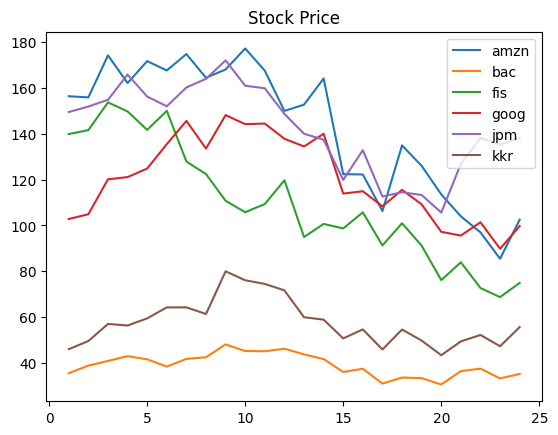

In [151]:
data_x = np.transpose(np.array(range(24))+1)
for i in range(len(data_pd)):
    plt.plot(data_x, data_pd[i], '-',label=stocks[i])
    plt.title("Stock Price")
plt.legend()

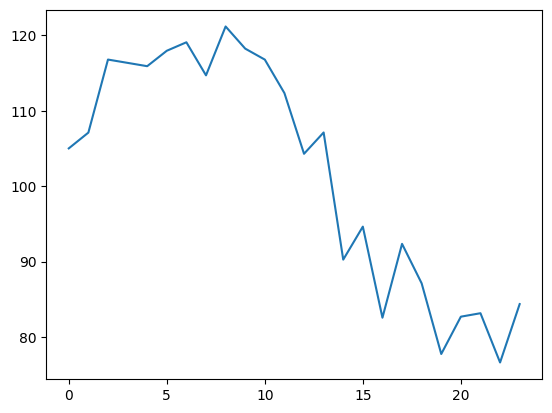

In [175]:
plt.plot(np.mean(ys,axis=0))

In [176]:

xs = np.transpose(np.array(range(24))+1)
# xs = np.repeat(xs, repeats=6, axis=0)

# p0 = (2000, .1, 50) # start with values near those we expect
ys = np.asarray(data_pd)
params, cv = scipy.optimize.curve_fit(monoExp, (xs)[8:], np.mean(ys,axis=0)[8:])

lambd, t, b = params


/tmp/ipykernel_78/97073324.py:5: RuntimeWarning: overflow encountered in exp
  return lambd * np.exp(-t * x) + b


In [186]:
print(lambd, t, b)

159.39268845565485 0.11479677159364837 68.2462145464134


In [184]:
# sampleRate = 20_000 # Hz
# tauSec = (1 / t) / sampleRate

gt_ys = np.mean(ys,axis=0)[8:]
# determine quality of the fit
squaredDiffs = np.square(gt_ys - monoExp(xs[8:], lambd, t, b))
squaredDiffsFromMean = np.square(gt_ys - np.mean(ys[8:]))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")



R² = nan


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Fitted Exponential Curve')

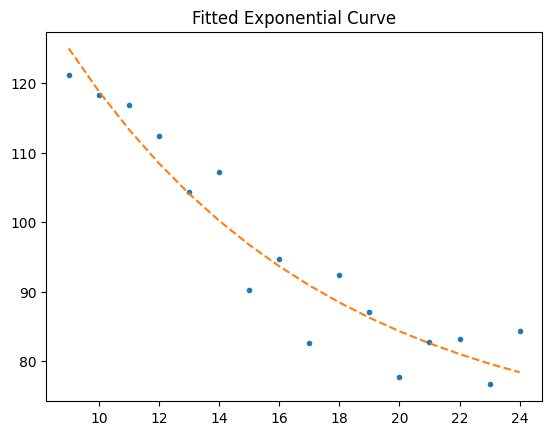

In [185]:
# plot the results
plt.plot(xs[8:], gt_ys, '.', label="data")
plt.plot(xs[8:], monoExp(xs[8:], lambd, t, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")

# # inspect the parameters
# print(f"Y = {m} * e^(-{t} * x) + {b}")
# print(f"Tau = {tauSec * 1e6} µs")